In [107]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [108]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [109]:
img_size = 28
num_img_test = 10000
num_img_train = 60000
BATCH_SIZE = 1000

In [110]:
#np.random.randint?
samples = np.random.randint(0,size =8, high = 59999)
print(samples)

[28672 33886 12219 42699 48686 45411 17502 30530]


In [111]:
img1 = X_train[samples,:]
img_label = y_train[samples]
print(img_label)

[9 6 0 9 9 9 5 3]


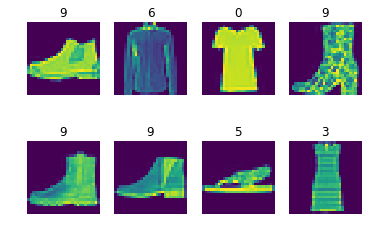

In [112]:
for i , img2 in enumerate(img1):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    plt.title(img_label[i])
    img2 = img2.reshape(28,28)
    plt.imshow(img2)
    
plt.show()

In [113]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [114]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], img_size, img_size,1)
X_test = X_test.reshape(X_test.shape[0],img_size, img_size,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [115]:
Y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [116]:
model = Sequential()
model.add(Convolution2D(32,3,3, activation='relu', input_shape = (img_size, img_size,1)))
model.add(Convolution2D(32,3,3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

C:\Users\GuptaG\AppData\Roaming\Python\Python35\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\GuptaG\AppData\Roaming\Python\Python35\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, nb_epoch = 5 , verbose=1)

C:\Users\GuptaG\AppData\Roaming\Python\Python35\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
60000/60000 [==============================] - 240s - loss: 0.6687 - acc: 0.7658   
Epoch 2/5
60000/60000 [==============================] - 244s - loss: 0.3726 - acc: 0.8677   
Epoch 3/5
60000/60000 [==============================] - 242s - loss: 0.3105 - acc: 0.8881   
Epoch 4/5
60000/60000 [==============================] - 251s - loss: 0.2721 - acc: 0.9012   
Epoch 5/5
60000/60000 [==============================] - 251s - loss: 0.2449 - acc: 0.9106   


In [123]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

 9984/10000 [============================>.] - ETA: 0s[0.25816216760873795, 0.90739999999999998]
